In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import ROOT
ROOT.gSystem.Load("librootimeit.so")

Welcome to JupyROOT 6.09/03


0

In [2]:
def runNBranch(lb,nBranch):
    lb.setNBranches(nBranch)
    return lb.runTest()

def runNHist(lb,nHist):
    lb.setNHists(nHist)
    return lb.runTest()

In [3]:
lb=ROOT.LoadBase()
lb.setPath("/ssdisk02/test.root")
lb.setNBranches(50)
lb.setNHists(0)

In [ ]:
nBranches=np.arange(0,50)
times=np.array([runNBranch(lb,int(nBranch)) for nBranch in nBranches])

In [ ]:
bandwidth=lb.eventSize()/times/1024**2
plt.plot(nBranches, bandwidth)
plt.xlabel('# of branches')
plt.ylabel('Read Rate (MB/s)')

In [11]:
lb.setNBranches(50)
nHists=np.arange(0,101,1)
times=np.array([runNHist(lb,int(nHist)) for nHist in nHists]);

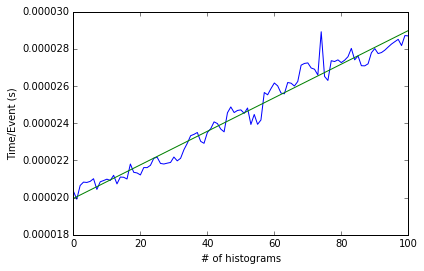

In [19]:
l=np.polyfit(nHists,times,deg=1)
f=np.poly1d(l)

plt.plot(nHists, times)
plt.plot(nHists, f(nHists))
plt.xlabel('# of histograms')
plt.ylabel('Time/Event (s)')

In [23]:
print(f)
print(l)

 
9.021e-08 x + 1.996e-05
[  9.02087498e-08   1.99577457e-05]
